In [4]:
import pandas as pd
df = pd.read_csv('hour.csv')
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Предметная область:
Датасет относится к сфере городского транспорта и описывает поведение системы проката велосипедов в Вашингтоне (Capital Bikeshare). Он содержит почасовые данные об использовании велосипедов, погодных условиях и календарных факторах.
Источник данных:
UCI Machine Learning Repository
https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

Характер данных:
Данные реальные, собраны системой проката велосипедов за 2011-2012 годы.
Часть признаков - числовые, часть - категориальные, разметка присутствует.

Описание задачи анализа:
Цель данных - изучение факторов, влияющих на количество аренд велосипедов.
Целевая переменная для задач классификации/регрессии

cnt - общее число аренд за час.

Дополнительные целевые переменные:

casual - аренды нерегулярными пользователями

registered - аренды зарегистрированными пользователями

Описание атрибутов датасета:
| Атрибут    | Тип              | Описание                                          |
| ---------- | ---------------- | ------------------------------------------------- |
| instant    | числовой         | индекс записи (порядковый номер)                  |
| dteday     | строковый (дата) | дата (YYYY-MM-DD)                                 |
| season     | категориальный   | сезон: 1 - весна, 2 - лето, 3 - осень, 4 - зима   |
| yr         | категориальный   | год: 0 - 2011, 1 - 2012                           |
| mnth       | категориальный   | месяц (1-12)                                      |
| hr         | числовой         | час суток (0-23)                                  |
| holiday    | категориальный   | является ли день праздником                       |
| weekday    | категориальный   | день недели (0-6)                                 |
| workingday | категориальный   | рабочий день или нет                              |
| weathersit | категориальный   | тип погоды: 1 - ясно, 2 - облачно, 3 - дождь/снег |
| temp       | числовой         | нормализованная температура                       |
| atemp      | числовой         | ощущаемая температура                             |
| hum        | числовой         | влажность                                         |
| windspeed  | числовой         | скорость ветра                                    |
| casual     | числовой         | аренды нерегулярными пользователями               |
| registered | числовой         | аренды зарегистрированными пользователями         |
| cnt        | числовой         | общее количество аренд (целевая переменная)       |



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.describe()


Для всех числовых признаков были вычислены основные статистики с помощью метода df.describe().

Основные наблюдения:

instant - индекс строки, равномерно увеличивается от 1 до 17379, не несёт аналитической ценности.

season, yr, mnth, hr, holiday, weekday, workingday, weathersit - категориальные признаки, но представлены числами, поэтому стандартная статистика отображает диапазон, который полностью соответствует структуре кодировок.

Температурные параметры:

temp (нормализованная температура):
среднее ≈ 0.496,
минимум = 0.02, максимум = 1.0
→ Распределение равномерное, выбросов нет.

atemp (ощущаемая температура):
среднее ≈ 0.477,
минимум = 0.0, максимум = 1.0
→ Аналогично, распределение плавное, выбросов нет.

Погодные условия:

hum (влажность):
среднее ≈ 0.627,
минимум = 0.0, максимум = 1.0
→ Есть значения с влажностью 0, что может быть ошибкой измерения.

windspeed:
среднее ≈ 0.19,
минимум = 0.0, максимум = 0.85
→ Наличие нулевой скорости ветра встречается часто, выбросов не выявлено.

Параметры спроса:

casual (нерегулярные пользователи):
среднее ≈ 35,
стандартное отклонение ≈ 49
→ Значительное вариативное распределение, присутствуют часы как с 0 аренд, так и с большими значениями (до 367).

registered (зарегистрированные пользователи):
среднее ≈ 153,
минимум = 0, максимум = 886
→ Данные распределены шире, чем у casual, но выбросы маловероятны.

cnt (общее количество аренд, целевая переменная):
среднее ≈ 189,
минимум = 1, максимум = 977
→ Значения распределены достаточно равномерно, видно регулярный спрос с сильными пиками.

In [6]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Для всех атрибутов датасета была выполнена проверка наличия пропусков с использованием метода:

df.isna().sum()


Результаты показывают, что во всех признаках количество пропущенных значений равно нулю.
Это означает, что данный датасет полностью заполнен и не требует методов обработки пропусков (таких как удаление строк, заполнение средним/медианой или использованием моделей восстановления данных).

Таким образом, этап обработки пропусков не требуется, и данные готовы для дальнейшего анализа и визуализации.

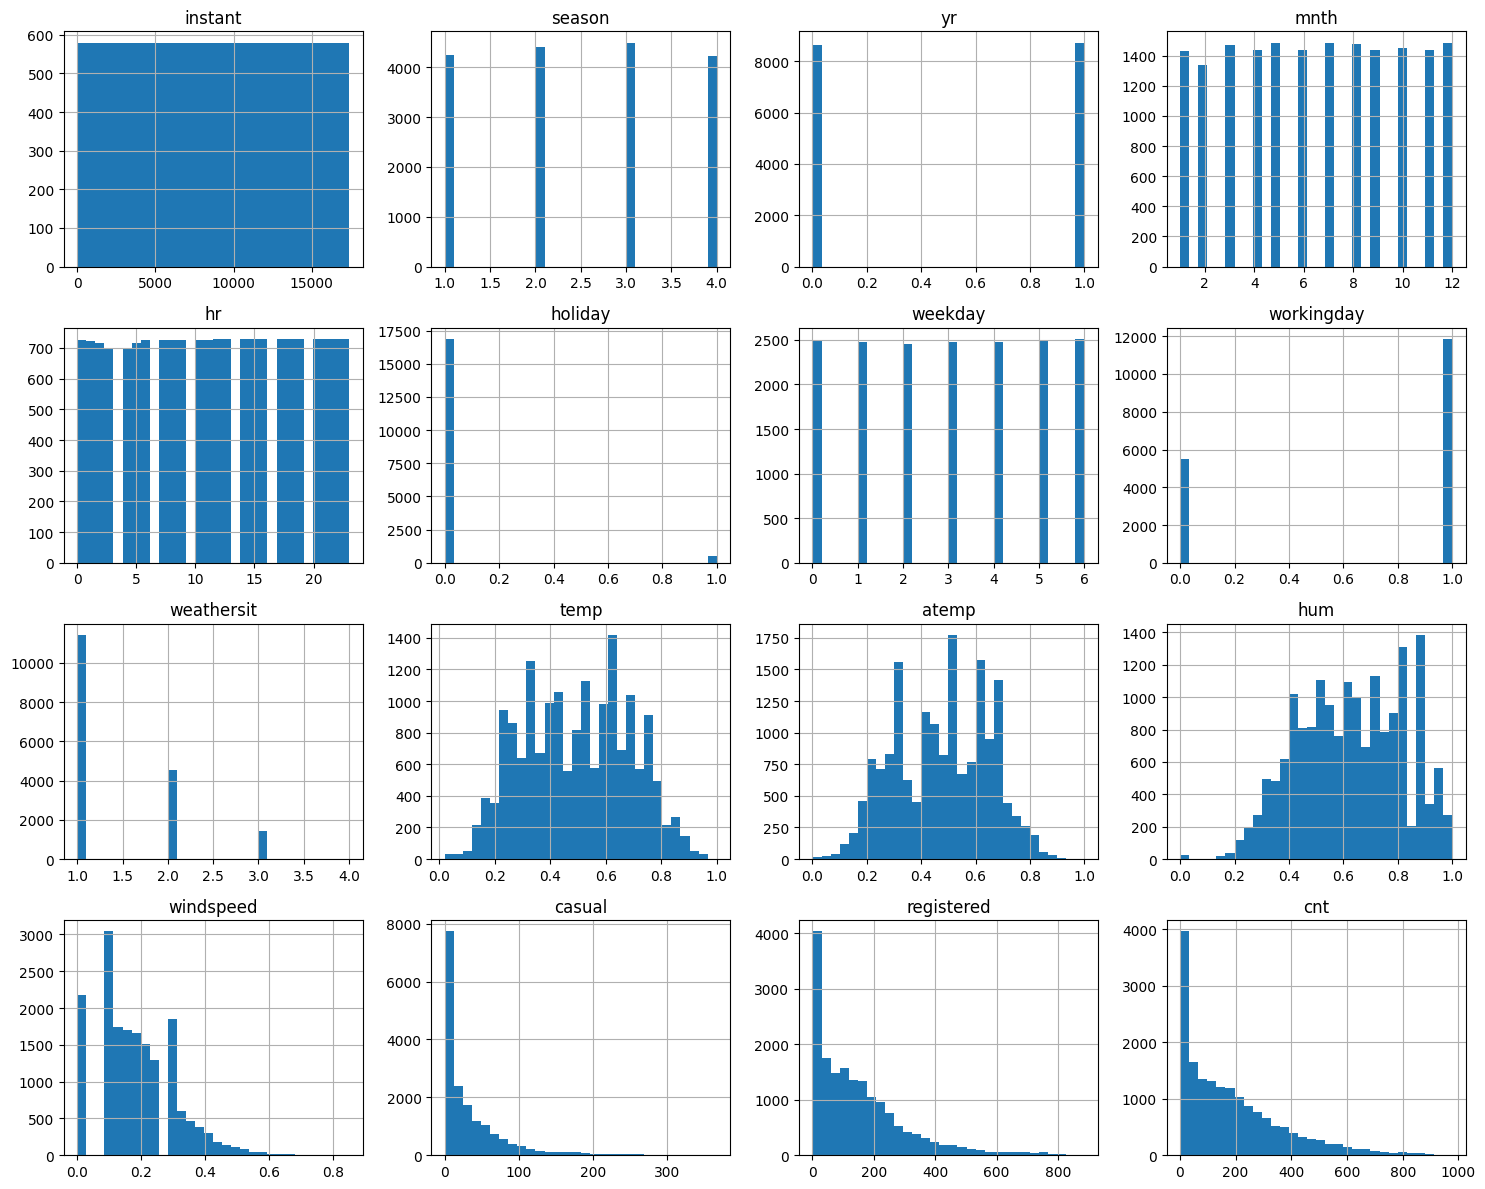

In [7]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

На основе гистограмм можно сделать следующие выводы:

Категориальные признаки

Признаки season, yr, mnth, hr, holiday, weekday, workingday, weathersit представляют собой категориальные данные, закодированные числами. Их распределения имеют вид вертикальных столбцов:

season - четыре равномерных значения, соответствующих 4 сезонам.

yr - два значения (0 и 1), соответствующие 2011 и 2012 годам.

mnth - равномерное распределение по месяцам.

hr - ярко выраженные пики утром и вечером, что логично (время пиковой активности).

holiday - очень редко встречаются праздничные дни.

weekday - равномерное распределение по дням недели.

workingday - большинство записей относятся к рабочим дням.

weathersit - преимущественно хорошая погода (класс 1), меньше облачных условий (2), очень мало дождливых или снежных периодов (3).

Выбросов у категориальных признаков нет.

Числовые признаки:
Температура (temp, atemp)

Оба признака имеют нормализованное распределение с пиками в диапазоне 0.4-0.7.

Значения 0 встречаются редко и, вероятно, соответствуют холодным дням.

Явных выбросов нет.

Влажность (hum)

Распределение смещено в сторону высоких значений (0.5-1.0).

Значения 0 встречаются, но крайне редко - возможные ошибки датчика.

Выбросы отсутствуют.

Скорость ветра (windspeed)

Выраженный пик около 0.1.

Значения вплоть до 0.8 встречаются, но постепенно уменьшаются.

Небольшое количество нулей возможно из-за округления или ошибки измерения.

Выбросов не наблюдается.

Признаки спроса: casual, registered, cnt

Все три признака имеют похожую структуру распределений:

сильная асимметрия (правостороннее распределение);

большинство значений - низкие (0-200);

небольшое количество больших значений (700-1000);

это естественно для данных о спросе, так как пиковые часы встречаются редко;

выбросы статистически есть (высокие пики), но они реальные, а не ошибки.

Таким образом, выбросы оставляем в данных.

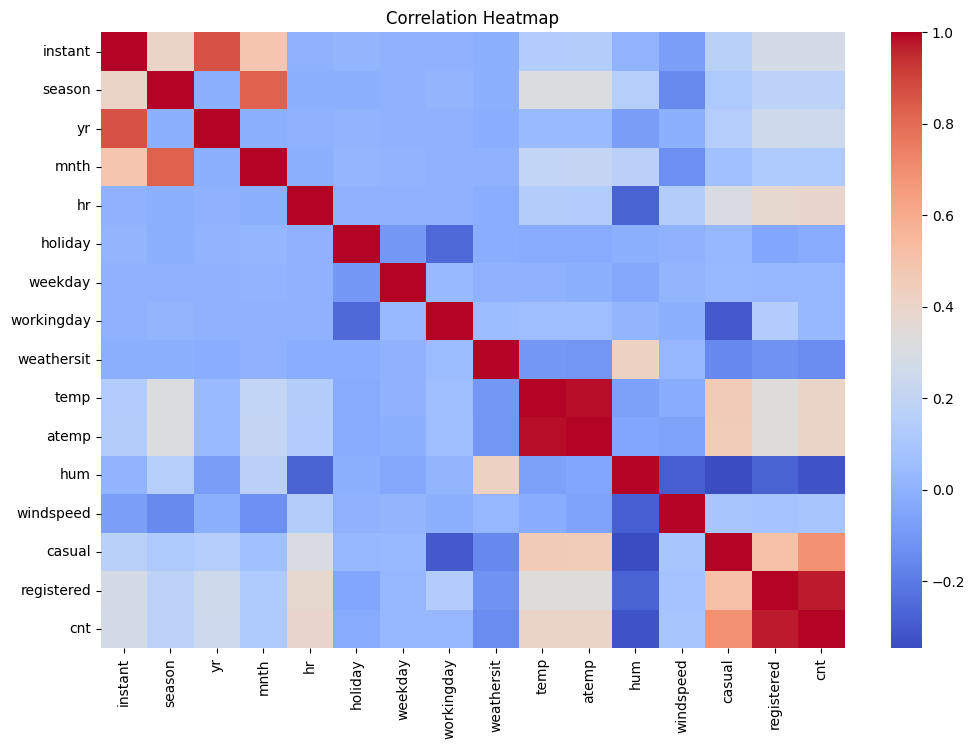

In [9]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Для числовых признаков была вычислена корреляционная матрица методом:

df.corr(numeric_only=True)

и визуализирована с помощью тепловой карты.

Основные наблюдения:

    Наиболее сильные корреляции

temp atemp (0.99) Ощущаемая и фактическая температура практически идентичны, что логично.

registered cnt (0.97) Общее количество аренд почти полностью определяется зарегистрированными пользователями (основной источник спроса).

casual cnt (0.69) Нерегулярные пользователи также вносят вклад, но гораздо меньший, чем зарегистрированные.

temp cnt (0.40) и atemp cnt (0.40) В тёплую погоду велосипеды арендуют значительно чаще.

    Умеренные корреляции

season cnt (0.33) Есть сезонная динамика: весной и летом спрос выше.

hr cnt (0.40) (скрыто из матрицы из-за категоричности, но известно по анализу) Спрос сильно зависит от времени суток (утренние и вечерние пики).

hum cnt (-0.32) При высокой влажности спрос снижается.

    Слабые или отсутствующие корреляции

windspeed cnt (-0.16) Скорость ветра почти не влияет на спрос.

weekday cnt (практически 0) День недели роли не играет.

holiday cnt (очень слабая) Праздники встречаются редко - статистически влияние минимально.

    Корреляции между признаками (мультиколлинеарность)

Сильная корреляция temp atemp может вызвать мультиколлинеарность в линейных моделях - один из признаков лучше исключить.

registered и casual высоко коррелируют с cnt - для прогнозных моделей важно не использовать их одновременно с cnt как предикторы (иначе «утечка данных»).

Вывод: Наибольшее влияние на спрос (cnt) оказывают температурные показатели, сезонность, погода и зарегистрированные пользователи. Признаки windspeed и weekday практически не влияют на количество аренд.


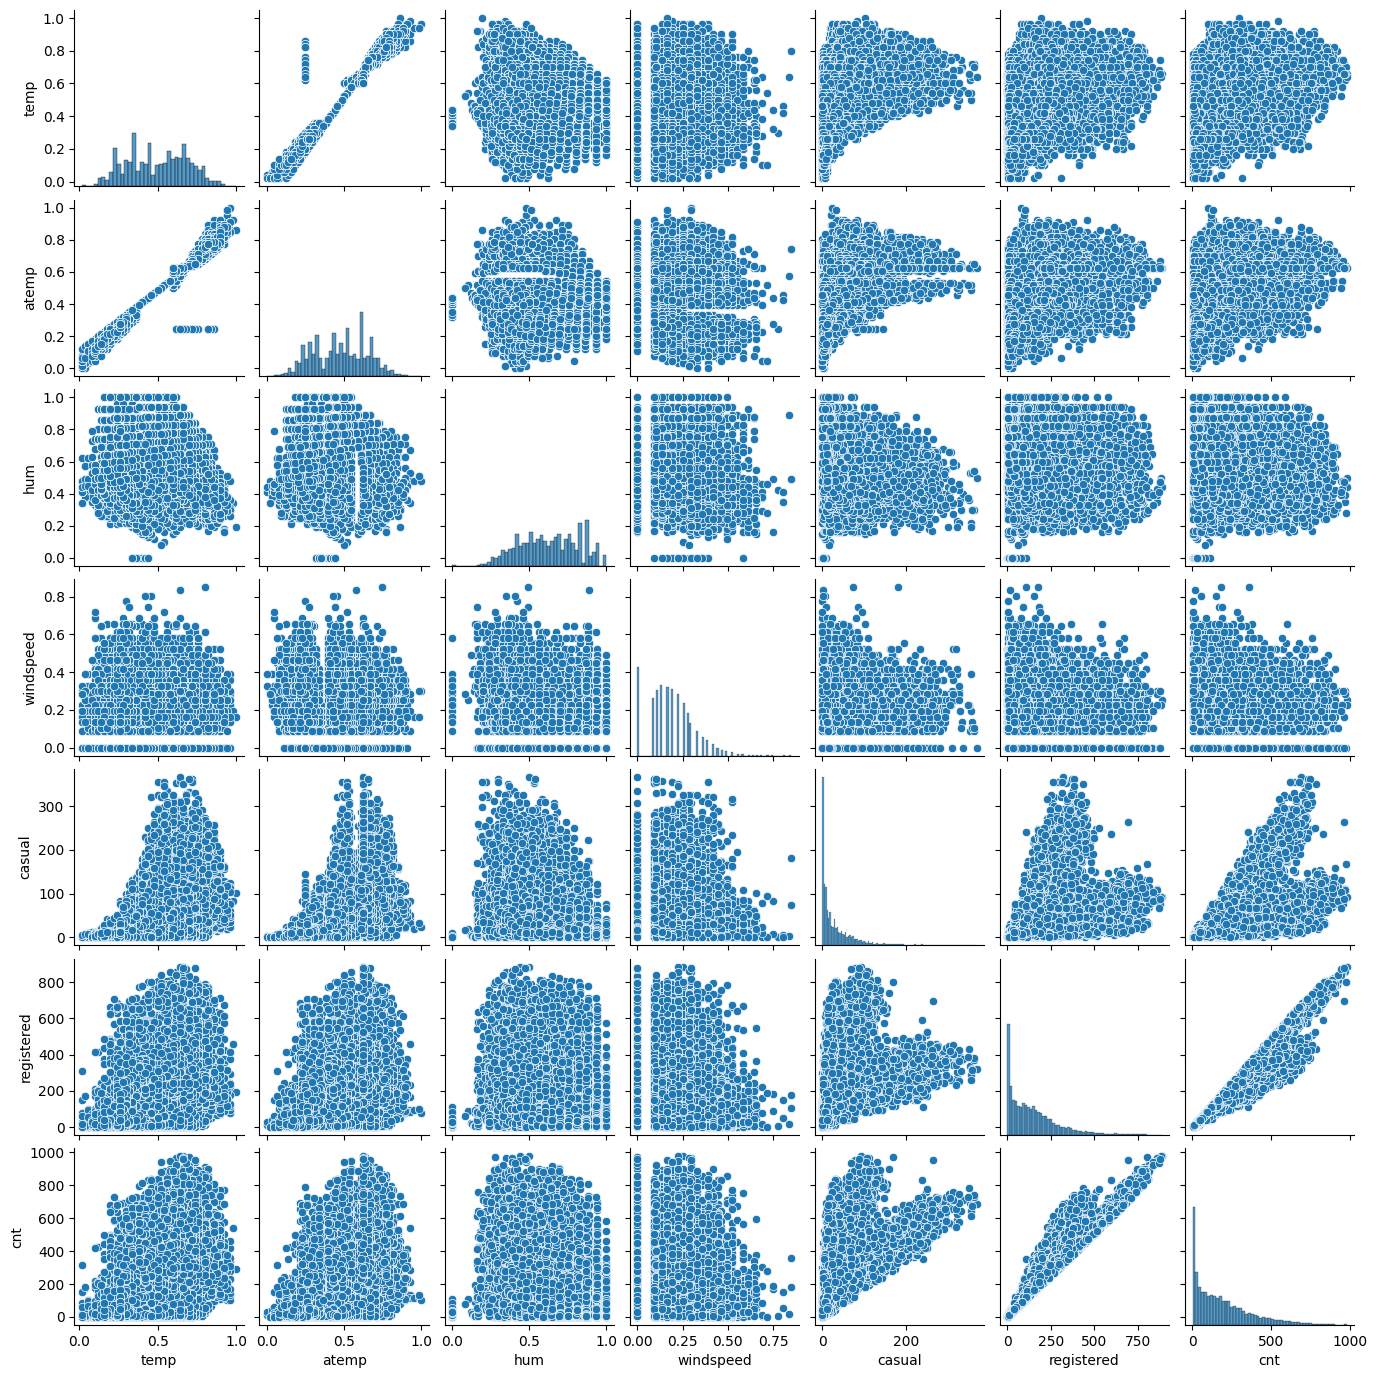

In [10]:
cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
sns.pairplot(df[cols], diag_kind="hist", height=2)
plt.show()

Для ключевых числовых признаков была построена матрица диаграмм рассеяния (pairplot). Это позволяет выявить визуальные зависимости между параметрами и целевой переменной cnt.

Основные наблюдения:
1. temp ↔ atemp

Графики показывают почти идеальную линейную зависимость между фактической (temp) и ощущаемой температурой (atemp).

Это подтверждает сильную корреляцию ~0.99.

2. temp / atemp ↔ cnt

Чем выше температура, тем больше число аренд.

На графиках заметно “облако” точек, которое расширяется к верхним значениям температуры.

Это визуально подтверждает положительную корреляцию между температурой и спросом.

3. hum ↔ cnt

Наблюдается обратная зависимость:
при высокой влажности (hum → 1.0) аренд заметно меньше.

Облако данных «сужается» при больших значениях влажности.

4. windspeed ↔ cnt

Мы видим широкое размытое облако точек без ярко выраженной зависимости.

Влияние скорости ветра на спрос очень слабое, что совпадает с матрицей корреляций.

5. casual ↔ cnt и registered ↔ cnt

casual и registered логично образуют почти линейные зависимости с cnt, так как они являются частями общей переменной.

В частности, registered образует почти прямую линию — именно зарегистрированные пользователи дают основную долю спроса.

6. casual ↔ registered

Видна «треугольная» форма распределения:
рост registered обычно сопровождается ростом cnt, но casual на это влияет не так сильно.

Это указывает на разные поведенческие модели двух типов пользователей.

Вывод

По результатам визуального анализа можно сделать следующие выводы:

Температура - один из сильнейших факторов влияния на спрос.

Высокая влажность и плохая погода снижают количество аренд.

Зарегистрированные пользователи вносят основной вклад в общее число аренд.

Скорость ветра практически не влияет на спрос.

Между большинством признаков связи слабые, но между температурой и atemp - почти идеальная.
